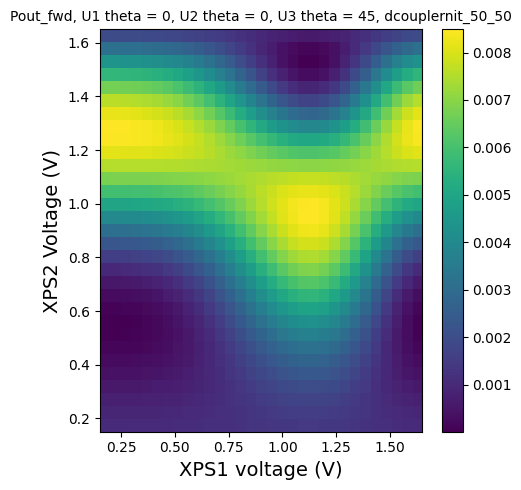

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

root = r'/Users/adam/Library/CloudStorage/GoogleDrive-adam@lightmatter.co/My Drive/Cadence_Data/Sim/congo/tstab_ana_tb/pc_exploration_tb/'
u1_theta = 0
u2_theta = 0
u3_theta = 45
dcoupler = 50
dcoupler2 = 50
extra = '_v1010'

filename = f'pol_cntrl_pnt_31_u1_{u1_theta}_u2_{u2_theta}_u3_{u3_theta}_dcouplernit_{dcoupler}_{dcoupler2}' + extra
csv_file_path = os.path.join(root, filename + '.csv')
df = pd.read_csv(csv_file_path)


# Split the data into two sub-dataframes for PD1 and PD2 based on column names
#print(df.columns)

pd1_columns = [col for col in df.columns if 'P_out_up' in col]
pd2_columns = [col for col in df.columns if 'P_out_down' in col]
prin_columns = [col for col in df.columns if 'Pr_in' in col]
df1 = df[pd1_columns]
df2 = df[pd2_columns]
df3 = df[prin_columns]
vdc1_vals = np.linspace(0.15, 1.65, 31)
vdc2_vals = np.linspace(0.15, 1.65, 31)



x_values = vdc1_vals
y_values = vdc2_vals
X, Y = np.meshgrid(x_values, y_values)

Z1 = df1.values.tolist()
Z2 = df2.values.tolist()
Z3 = df3.values.tolist()

Z1= np.array(Z1).T
Z2= np.array(Z2).T
Z3= np.array(Z3).T
# for i in range(len(Z1)):
#    print(len(Z1[i]), len(X), len(Y), len(Z1))
fig, ax = plt.subplots(figsize=(5, 5))  # 1 row, 1 columns
axplot = plt.imshow(Z2, cmap='viridis', aspect='auto', origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
ax.set_title('Imshow Plot 1')
ax.set_xlabel('XPS1 voltage (V)', fontsize = 14)
ax.set_ylabel('XPS2 Voltage (V)', fontsize = 14)
ax.set_title(f'Pout_fwd, U1 theta = {u1_theta}, U2 theta = {u2_theta}, U3 theta = {u3_theta}, dcouplernit_{dcoupler}_{dcoupler2}', fontsize = 10)
plt.colorbar(axplot)

plt.tight_layout()
plt.savefig(os.path.join('/Users/adam/Library/CloudStorage/GoogleDrive-adam@lightmatter.co/My Drive/Congo/Jaguar/Tstab/Polarization Controller/Python', 'plots', filename + '_Pout.jpg'), dpi = 300)
plt.show()

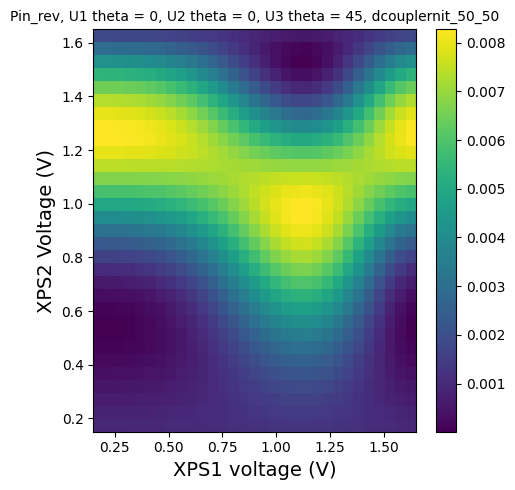

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))  # 1 row, 2 columns
axplot = plt.imshow(Z3, cmap='viridis', aspect='auto', origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
ax.set_title('Imshow Plot 1')
ax.set_xlabel('XPS1 voltage (V)', fontsize = 14)
ax.set_ylabel('XPS2 Voltage (V)', fontsize = 14)
ax.set_title(f'Pin_rev, U1 theta = {u1_theta}, U2 theta = {u2_theta}, U3 theta = {u3_theta}, dcouplernit_{dcoupler}_{dcoupler2}', fontsize = 10)
plt.colorbar(axplot)

plt.tight_layout()
plt.savefig(os.path.join('/Users/adam/Library/CloudStorage/GoogleDrive-adam@lightmatter.co/My Drive/Congo/Jaguar/Tstab/Polarization Controller/Python', 'plots', filename + '_Pin.jpg'), dpi = 300)
plt.show()

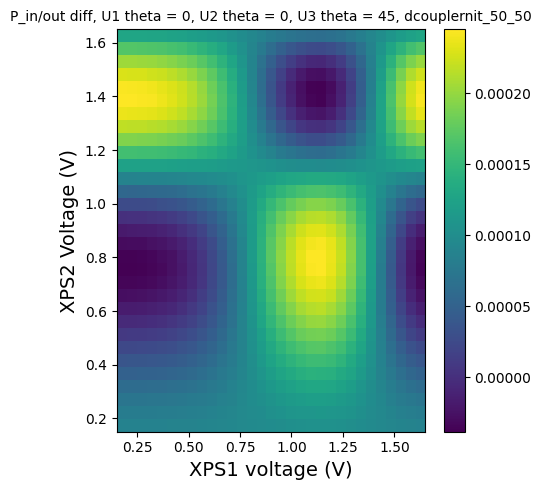

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))  # 1 row, 2 columns
axplot = plt.imshow(Z2-Z3, cmap='viridis', aspect='auto', origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
ax.set_title('Imshow Plot 1')
ax.set_xlabel('XPS1 voltage (V)', fontsize = 14)
ax.set_ylabel('XPS2 Voltage (V)', fontsize = 14)
ax.set_title(f'P_in/out diff, U1 theta = {u1_theta}, U2 theta = {u2_theta}, U3 theta = {u3_theta}, dcouplernit_{dcoupler}_{dcoupler2}', fontsize = 10)
plt.colorbar(axplot)

plt.tight_layout()
plt.savefig(os.path.join('/Users/adam/Library/CloudStorage/GoogleDrive-adam@lightmatter.co/My Drive/Congo/Jaguar/Tstab/Polarization Controller/Python', 'plots', filename + '_Pdiff.jpg'), dpi = 300)
plt.show()